# Tema 1.2 $\quad$ Análisis descriptivo de los datos de un activo

Antes de analizar los datos de una cartera de activos, vamos a ver cómo se analizan los datos de un solo activo. Para ello vamos a:

* Descarga y visualización de un activo

* Comprender las limitaciones de trabajar directamente con precios

* Binomio rentabilidad-riesgo
  * Calculo de la rentabilidad diaria
  * Diferencia entre la rentabilidad aritmética y la logarítmica
  * Análisis de los retornos. ¿Siguen una distribución normal?

In [ ]:
!pip install mplfinance

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
import warnings

import yfinance as yf

import statsmodels.api as sm

# print(plt.style.available) #list of available styles
plt.style.use("ggplot")

warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. Descarga y visualización de un activo

Primero, descargamos los datos OHLC del Santander para visualizarlos con diferentes herramientas.

In [ ]:
data_df = yf.download(
    "SAN.MC", auto_adjust=False, multi_level_index=False, actions=True
)



data_df

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2000-01-03,2.705219,9.849401,0.0,9.987881,9.736886,9.953261,0.0,8797337
2000-01-04,2.641034,9.615716,0.0,9.780161,9.529166,9.728231,0.0,8811013
2000-01-05,2.576850,9.382031,0.0,9.555131,9.304136,9.433961,0.0,9333517
2000-01-06,2.576850,9.382031,0.0,9.382031,9.382031,9.382031,0.0,0
2000-01-07,2.690956,9.797471,0.0,9.823436,9.442616,9.451271,0.0,9603132
...,...,...,...,...,...,...,...,...
2025-02-25,6.045000,6.045000,0.0,6.135000,5.920000,5.920000,0.0,46958741
2025-02-26,6.232000,6.232000,0.0,6.234000,6.070000,6.075000,0.0,33375845
2025-02-27,6.198000,6.198000,0.0,6.268000,6.154000,6.200000,0.0,55538738


Mostramos información sobre la estructura del DataFrame: tipos de datos, índice, columnas.

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6464 entries, 2000-01-03 to 2025-03-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     6464 non-null   float64
 1   Close         6464 non-null   float64
 2   Dividends     6464 non-null   float64
 3   High          6464 non-null   float64
 4   Low           6464 non-null   float64
 5   Open          6464 non-null   float64
 6   Stock Splits  6464 non-null   float64
 7   Volume        6464 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 454.5 KB


Mostramos datos estadísticos sobre cada una de las columnas numéricas.

In [4]:
data_df.describe()

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6.464000e+03
mean,3.210761,6.406919,0.001301,6.485536,6.321098,6.407555,0.000319,7.434886e+07
std,0.844399,2.707876,0.012056,2.729893,2.679546,2.706447,0.018108,6.614042e+07
min,1.271282,1.473533,0.000000,1.502475,1.439417,1.444017,0.000000,0.000000e+00
25%,2.590108,4.151620,0.000000,4.197261,4.095015,4.147328,0.000000,3.547901e+07
50%,3.101257,5.913012,0.000000,5.998961,5.798856,5.906644,0.000000,5.700011e+07
75%,3.918966,8.438634,0.000000,8.564513,8.305127,8.438634,0.000000,9.072678e+07
max,6.297000,12.982515,0.244038,13.181580,12.913275,12.982515,1.043478,9.487686e+08


¿CUÁL ES LA DIFERENCIA ENTRE PRECIO DE CIERRE (``Close``) Y PRECIO DE CIERRE AJUSTADO (``Adj Close``)?

Para entender la diferencia, vamos a analizar el efecto de los splits y de los dividendos en los precios de las acciones:

* Un **split** es una división de las acciones de una empresa en varias acciones. Por ejemplo, si una acción vale 100 euros y se hace un split de 1 a 2, entonces cada acción valdrá 50 euros. El número de acciones se duplica y el precio se divide por dos.

* Un **dividendo** es un pago que hace una empresa a sus accionistas. Por ejemplo, si una acción vale 100 euros y se paga un dividendo de 5 euros, entonces el precio de la acción bajará a 95 euros.

Vamos a visualizar los datos del **Banco Santander** y a comparar los datos **Close** y **Adj Close**:

* **Close**: es el precio de cierre sin ajustar por dividendos y splits.

* **Adj Close**: es el precio de cierre ajustado por dividendos y splits. Es el precio que se utiliza para calcular las rentabilidades.

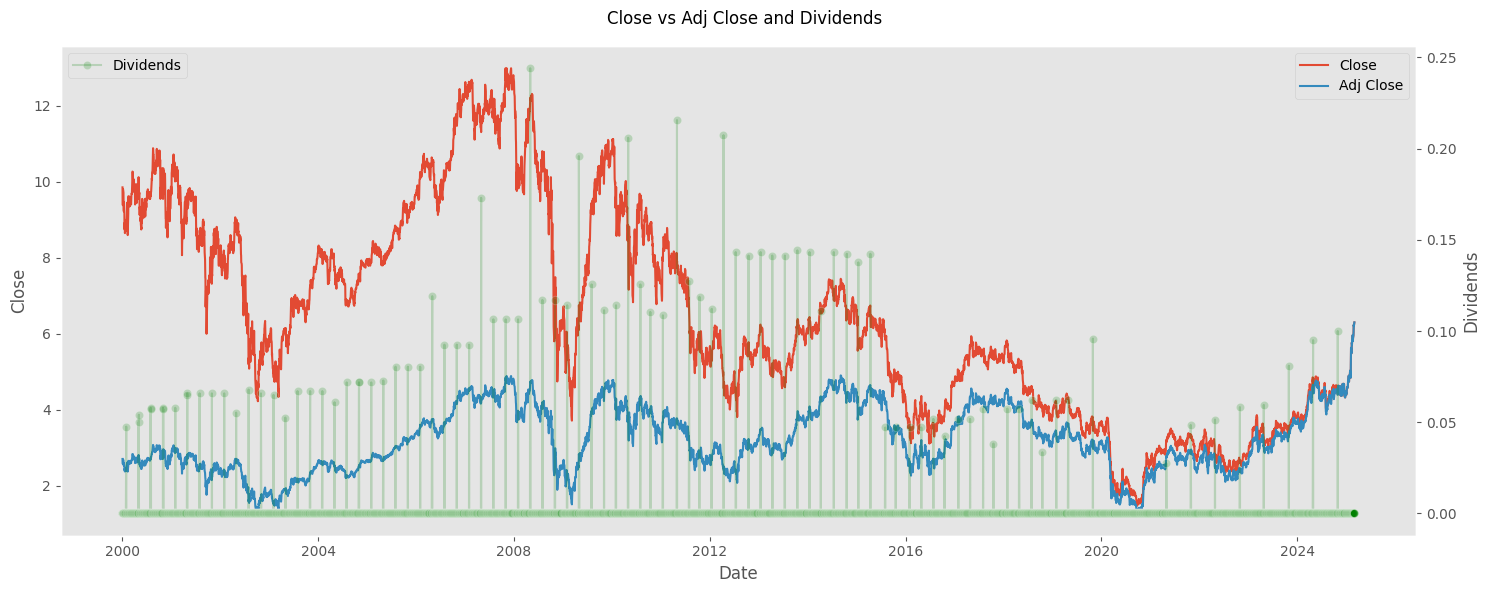

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(15, 6))

# Primer eje
sns.lineplot(data=data_df, x="Date", y="Close", label="Close", ax=ax1)
sns.lineplot(data=data_df, x="Date", y="Adj Close", label="Adj Close", ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close")
ax1.grid(False)

# Segundo eje
ax2 = ax1.twinx()

sns.lineplot(
    data=data_df,
    x="Date",
    y="Dividends",
    style=True,
    markers=True,
    ax=ax2,
    color="green",
    alpha=0.2,
)
ax2.set_ylabel("Dividends")
ax2.grid(False)
ax2.legend(["Dividends"], loc="upper left")

fig.suptitle("Close vs Adj Close and Dividends")
fig.tight_layout()
plt.show()

La manera más habitual de visualizar los datos OHLCV de forma conjunta es usando un gráfico de velas usando.

Para ello podemos utilizar distintas librerías, por ejemplo `mplfinance`.

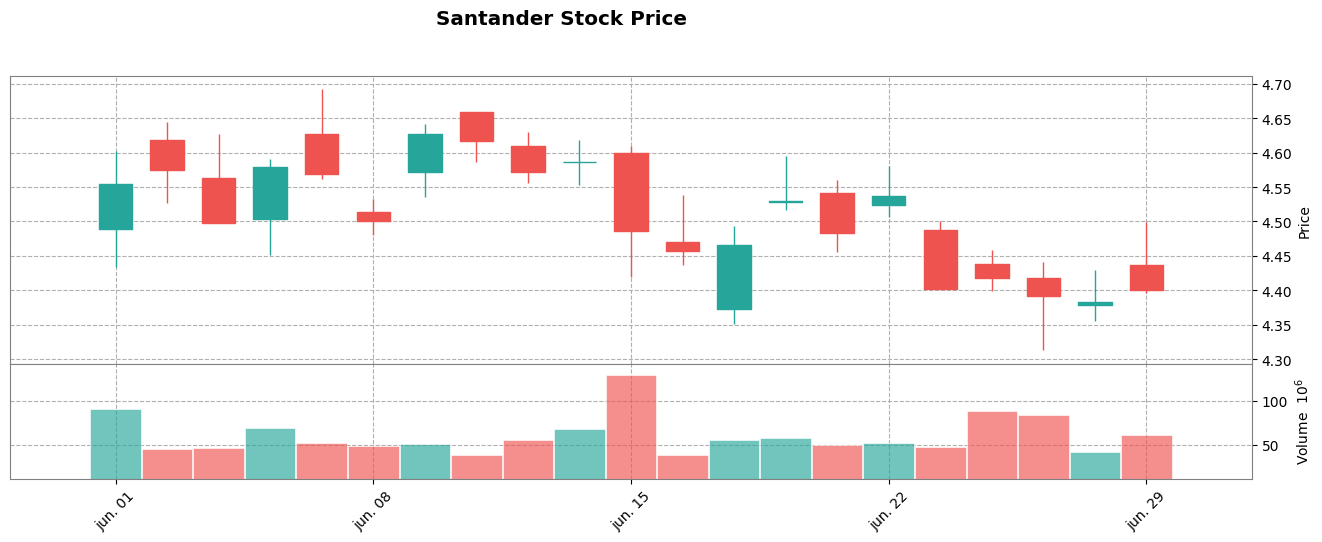

In [6]:
fig, ax = mpf.plot(
    data_df.loc["2018-06"],
    type="candle",  # En el argumento type indicamos que queremos dibujar un gráfico de velas
    volume=True,  # El argumento volume indica si queremos representar el volumen
    style="tradingview",  # El argumento style nos permite visualizar los datos como en la plataforma TradingView
    figratio=(12, 4),
    title=f"Santander Stock Price",
    returnfig=True,
)
# ax[0].axhline(data_df.loc["2018-06-01"]["Open"], color="red", linestyle="--", linewidth=1, alpha=0.5)
# ax[0].axhline(data_df.loc["2018-06-01"]["High"], color="red", linestyle="--", linewidth=1, alpha=0.5)
# ax[0].axhline(data_df.loc["2018-06-01"]["Low"], color="red", linestyle="--", linewidth=1, alpha=0.5)
# ax[0].axhline(data_df.loc["2018-06-01"]["Close"], color="red", linestyle="--", linewidth=1, alpha=0.5)

O también la librería `plotly`:

In [7]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=data_df.loc["2018-06"].index,
            open=data_df.loc["2018-06"]["Open"],
            high=data_df.loc["2018-06"]["High"],
            low=data_df.loc["2018-06"]["Low"],
            close=data_df.loc["2018-06"]["Close"],
        )
    ]
)

fig.update_layout(title=f"Santander Candlestick Price Chart", xaxis_tickfont_size=14)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

Prueba a pasar el ratón por encima de la figura en una vela en concreto. Puedes ver la información detallada de ese día. También puedes hacer zoom, desplazar la figura, etc.

## 1.2 Precios vs Retornos

En el ámbito financiero, no suele ser común trabajar directamente con los precios de los activos, sino que trabajamos con los **retornos** de los precios. Existen dos formas de calcular los retornos a partir de los precios de un activo:

**Retornos aritméticos:**

$$r_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

donde $P_t$ y $P_{t-1}$ representan los precios de cierre en los instantes de tiempo $t$ y $t-1$, respectivamente.

**Retornos logarítmicos:**

$$r_t = ln(\frac{P_t}{P_{t-1}}) = ln(P_t) - ln(P_{t-1})$$

donde, como antes, $P_t$ y $P_{t-1}$ representan los precios de cierre en los instantes de tiempo $t$ y $t-1$, respectivamente.

En ambas situaciones, estamos calculando la variación de los precios entre dos instantes de tiempo consecutivos $t$ y $t-1$.

Imagina que estás hablando sobre el crecimiento de una planta en tu jardín. En lugar de mirar la altura absoluta de la planta cada día, podrías estar más interesado en apuntar cuánto ha crecido en comparación con el día anterior. Este enfoque te permite medir el crecimiento de manera más consistente y comparar fácilmente el desarrollo de diferentes plantas, incluso si algunas son más grandes que otras desde el principio.

De manera similar, en finanzas trabajamos con retornos porque nos centramos en **cómo los activos cambian** en comparación con su valor anterior, en lugar de mirar directamente el precio absoluto. Al hacerlo, podemos comparar diferentes activos y entender mejor cómo varían, lo que facilita la toma de decisiones y el análisis sin verse afectados por las diferencias en la escala de los precios. Es como medir el crecimiento de las plantas observando cuánto han crecido en lugar de simplemente mirar su altura total.

Además, hay una serie de razones por las que es más ventajoso trabajar con retornos:

* **Normalización de datos**: Los retornos permiten normalizar los datos y eliminar la escala absoluta de los precios. Esto facilita la comparación entre diferentes activos financieros, especialmente aquellos con precios muy diferentes.
* **Facilita el análisis estadístico**: Al trabajar con retornos, ``se asume`` que las **rentabilidades son estacionarias débiles** y tienen propiedades estadísticas más estables que los precios absolutos. Esto facilita el uso de herramientas estadísticas y modelos matemáticos en el análisis financiero.
    * Serie estacionaria débil: la media y la varianza de la serie permanecen constantes, y la covarianza entre dos puntos temporales cualesquiera depende únicamente de la diferencia de tiempo entre ellos, en lugar del momento real en el que se realizan las observaciones. 
* **Gestión de riesgos**: En el ámbito de la gestión de riesgos, los retornos son cruciales. Los inversores y gestores de fondos suelen evaluar el riesgo en términos de variaciones en los retornos más que en los cambios absolutos en los precios.
* **Elimina tendencias a largo plazo**: Al trabajar con retornos, se elimina la tendencia de la serie.
* **Simplicidad en cálculos**: En muchos casos, los cálculos de retornos son más simples que los de precios, especialmente cuando se trata de comparar activos a lo largo del tiempo.

Por otro lado, al hacer estudios estadísticos, se utilizan siempre **retornos logarítmicos**:
* Los logaritmos de los precios siguen una distribución normal, esto es, los precios siguen una distribución log-normal.
* Cuando la variación en precio es pequeña, los retornos logarítmicos son muy similares a los retornos aritméticos.
* $log(\frac{p_d}{p_{d-1}})=log(p_d)-log(p_{d-1})$
* La suma (resta) es numéricamente más estable que la multiplicación (división) cuando los números son muy pequeños.


Ref.: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

Veamos la diferencia entre calcular los retornos aritméticos y logarítmicos:

In [8]:
import numpy as np

data_df["log_ret"] = np.log(data_df.loc[:, ["Close"]]).diff()
data_df["pct_ret"] = data_df.loc[:, ["Close"]].pct_change()

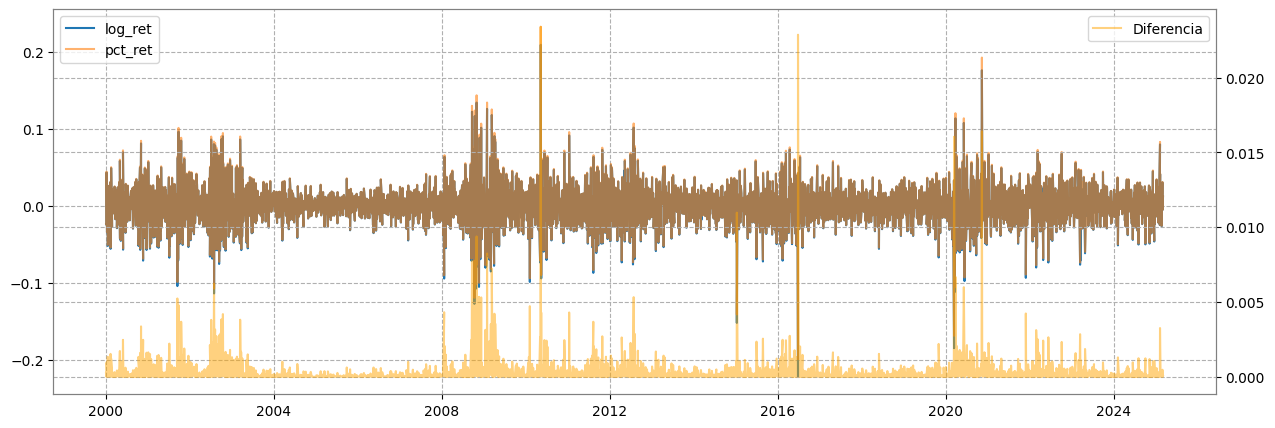

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Graficamos series de retornos en el primer eje.
ax.plot(data_df["log_ret"], label="log_ret")
ax.plot(data_df["pct_ret"], label="pct_ret", alpha=0.6)
plt.legend(loc="upper left")

ax2 = ax.twinx()  # Instanciamos un segundo eje y
ax2.plot(
    np.abs(data_df["pct_ret"] - data_df["log_ret"]),
    label="Diferencia",
    color="orange",
    alpha=0.5,
)
plt.legend(loc="upper right")

plt.grid(True)
plt.show()

Información sobre la distribución de las diferencias entre los dos tipos de rentabilidades.

count    6463.000000
mean        0.000242
std         0.000744
min         0.000000
25%         0.000011
50%         0.000058
75%         0.000214
max         0.023392
dtype: float64


<Axes: >

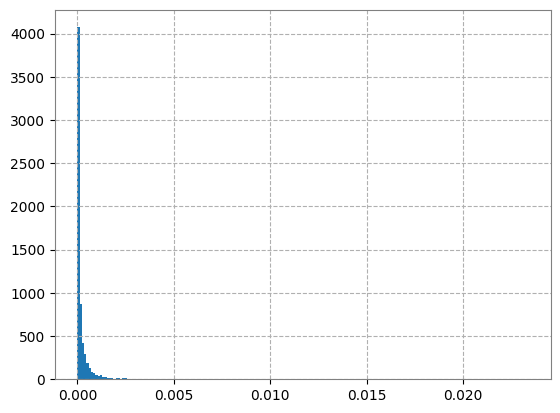

In [10]:
print((np.abs(data_df["pct_ret"] - data_df["log_ret"])).describe())
(np.abs(data_df["pct_ret"] - data_df["log_ret"])).hist(bins=200)

Como véis, son prácticamente iguales. Por tanto, por comodidad en el resto de operaciones, **vamos a trabajar con retornos logarítmicos**.

## 1.3 Binomio rentabilidad-riesgo

Pintemos los retornos para ver su evolución temporal:

In [11]:
ret_df = data_df["log_ret"].dropna()

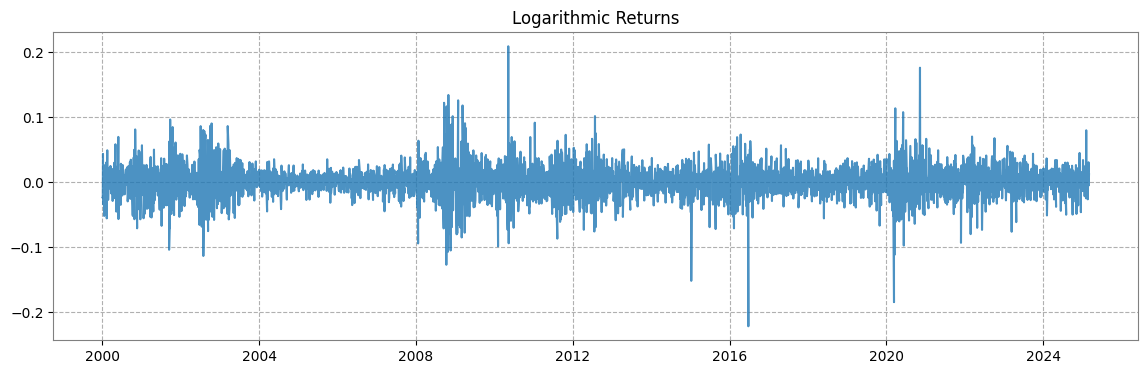

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(ret_df, alpha=0.8)
plt.title("Logarithmic Returns", c="black")
plt.show()

Veamos ahora su distribución:

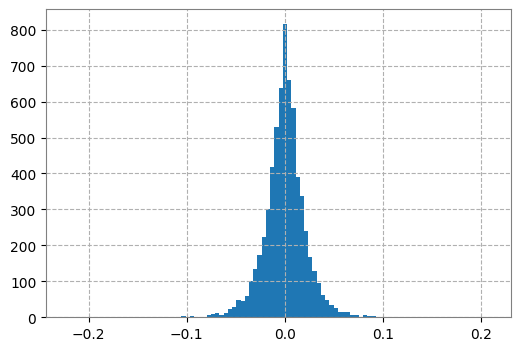

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(ret_df, bins=100)
plt.show()

Viendo la figura, aparentemente sigue una distribución Normal (Gaussiana). Entonces, podemos caracterizar los datos mediante su media y su desviación estándar:

1. Se calcula la rentabilidad media de los retornos:

$$\bar{r} = \frac{1}{n} \sum_{i=1}^n r_i$$

2. Se calcula la varianza de los retornos:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2$$

3. Se calcula la desviación típica de los retornos:

$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}$$

La rentabilidad, varianza y desviación típica **siempre se expresan en términos anuales**:

- Si los datos son **diarios**, consideramos que hay **252 días al año** de negociación.
- Si los datos son **mensuales**, consideramos que hay **12 meses al año**.

In [14]:
print(" Rentabilidad media: {:.4f}".format(ret_df.mean() * 252))
print(" Varianza: {:.4f}".format(ret_df.var() * 252))
print(" Desviación estándar: {:.4f}".format(np.sqrt(252) * ret_df.std()))

 Rentabilidad media: -0.0174
 Varianza: 0.1223
 Desviación estándar: 0.3496


Dado que los inversores tienen aversión al riesgo, los activos los representamos por el **binomio rentabilidad-riesgo**:

- La **rentabilidad** se mide como la media de los retornos.
    
- El **riesgo** se mide a través de la volatilidad, que es la desviación estándar de los rendimientos.

---

Vamos a descargar dos grupos de activos que nos servirán para analizar distintos comportamientos.

Lectura de los ficheros desde Github (utilizar desde colab)

In [15]:
file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/data_OHLC.xlsx"
data_OHLC_df = pd.read_excel(file_path, header=[0, 1], index_col=0, parse_dates=True)

file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/data_OHLC_corr.xlsx"
data_OHLC_df_corr = pd.read_excel(
    file_path, header=[0, 1], index_col=0, parse_dates=True
)

Lectura de los ficheros en local

In [ ]:
data_OHLC_df = pd.read_excel(
    "../data/data_OHLC.xlsx", header=[0, 1], index_col=0, parse_dates=True
)


data_OHLC_df_corr = pd.read_excel(
    "../data/data_OHLC_corr.xlsx", header=[0, 1], index_col=0, parse_dates=True
)

In [17]:
data_OHLC_df

Adj Close                                                 \
                  AAPL       BTC-USD     ELE.MC        IAU        IEF   
Date                                                                    
2013-10-07   15.203007           NaN   5.184735  25.680000  84.856277   
2013-10-08   14.990746           NaN   5.180736  25.620001  84.814644   
2013-10-09   15.166854           NaN   5.262038  25.340000  84.664726   
2013-10-10   15.261921           NaN   5.336677  24.980000  84.481369   
2013-10-11   15.360727           NaN   5.343342  24.639999  84.606331   
...                ...           ...        ...        ...        ...   
2023-10-01         NaN  27983.750000        NaN        NaN        NaN   
2023-10-02  173.750000  27530.785156  18.590000  34.639999  90.610001   
2023-10-03  172.399994  27429.978516  18.355000  34.529999  89.860001   
2023-10-04  173.660004  27799.394531  18.455000  34.520000  90.430000   
2023-10-05         NaN  27929.939453  18.730000        NaN        NaN   

                             Close                                      ...  \
                  TSLA        AAPL       BTC-USD     ELE.MC        IAU  ...   
Date                                                                    ...   
2013-10-07   12.204667   17.419643           NaN  19.450001  25.680000  ...   
2013-10-08   11.648667   17.176430           NaN  19.434999  25.620001  ...   
2013-10-09   11.252000   17.378214           NaN  19.740000  25.340000  ...   
2013-10-10   11.528667   17.487143           NaN  20.020000  24.980000  ...   
2013-10-11   11.913333   17.600357           NaN  20.045000  24.639999  ...   
...                ...         ...           ...        ...        ...  ...   
2023-10-01         NaN         NaN  27983.750000        NaN        NaN  ...   
2023-10-02  251.600006  173.750000  27530.785156  18.590000  34.639999  ...   
2023-10-03  246.529999  172.399994  27429.978516  18.355000  34.529999  ...   
2023-10-04  261.160004  173.660004  27799.394531  18.455000  34.520000  ...   
2023-10-05         NaN         NaN  27929.939453  18.730000        NaN  ...   

                 Open                                          Volume  \
               ELE.MC        IAU         IEF        TSLA         AAPL   
Date                                                                    
2013-10-07  19.360001  25.580000  102.059998   12.164000  312292400.0   
2013-10-08  19.420000  25.719999  101.800003   12.293333  290917200.0   
2013-10-09  19.375000  25.379999  101.790001   11.648667  301725200.0   
2013-10-10  19.825001  25.200001  101.269997   11.539333  278602800.0   
2013-10-11  20.045000  24.620001  101.690002   11.516667  267738800.0   
...               ...        ...         ...         ...          ...   
2023-10-01        NaN        NaN         NaN         NaN          NaN   
2023-10-02  19.315001  34.750000   90.889999  244.809998   52164500.0   
2023-10-03  18.610001  34.529999   90.419998  248.610001   49594600.0   
2023-10-04  18.430000  34.540001   90.139999  248.139999   52963300.0   
2023-10-05  18.629999        NaN         NaN         NaN          NaN   

                                                                         
                 BTC-USD     ELE.MC        IAU         IEF         TSLA  
Date                                                                     
2013-10-07           NaN   121645.0  2414350.0    454400.0  172284000.0  
2013-10-08           NaN   143155.0  1434200.0    818100.0  206358000.0  
2013-10-09           NaN   268379.0  3605650.0    506500.0  229747500.0  
2013-10-10           NaN   340366.0  3883650.0    649100.0  133258500.0  
2013-10-11           NaN   173073.0  2674950.0    850100.0  124666500.0  
...                  ...        ...        ...         ...          ...  
2023-10-01  9.503917e+09        NaN        NaN         NaN          NaN  
2023-10-02  1.979304e+10  2182411.0  9975900.0  21010000.0  123810400.0  
2023-10-03  1.140781e+10  1606529.0  9486800.0

Nos quedamos con los precios de cierre de cada día y examinamos nuestros datos.

In [18]:
data_close_df = data_OHLC_df["Adj Close"]
data_close_df

,AAPL,BTC-USD,ELE.MC,IAU,IEF,TSLA
Date,,,,,,
2013-10-07,15.203007,NaN,5.184735,25.680000,84.856277,12.204667
2013-10-08,14.990746,NaN,5.180736,25.620001,84.814644,11.648667
2013-10-09,15.166854,NaN,5.262038,25.340000,84.664726,11.252000
2013-10-10,15.261921,NaN,5.336677,24.980000,84.481369,11.528667
2013-10-11,15.360727,NaN,5.343342,24.639999,84.606331,11.913333
...,...,...,...,...,...,...
2023-10-01,NaN,27983.750000,NaN,NaN,NaN,NaN
2023-10-02,173.750000,27530.785156,18.590000,34.639999,90.610001,251.600006
2023-10-03,172.399994,27429.978516,18.355000,34.529999,89.860001,246.529999


<Axes: >

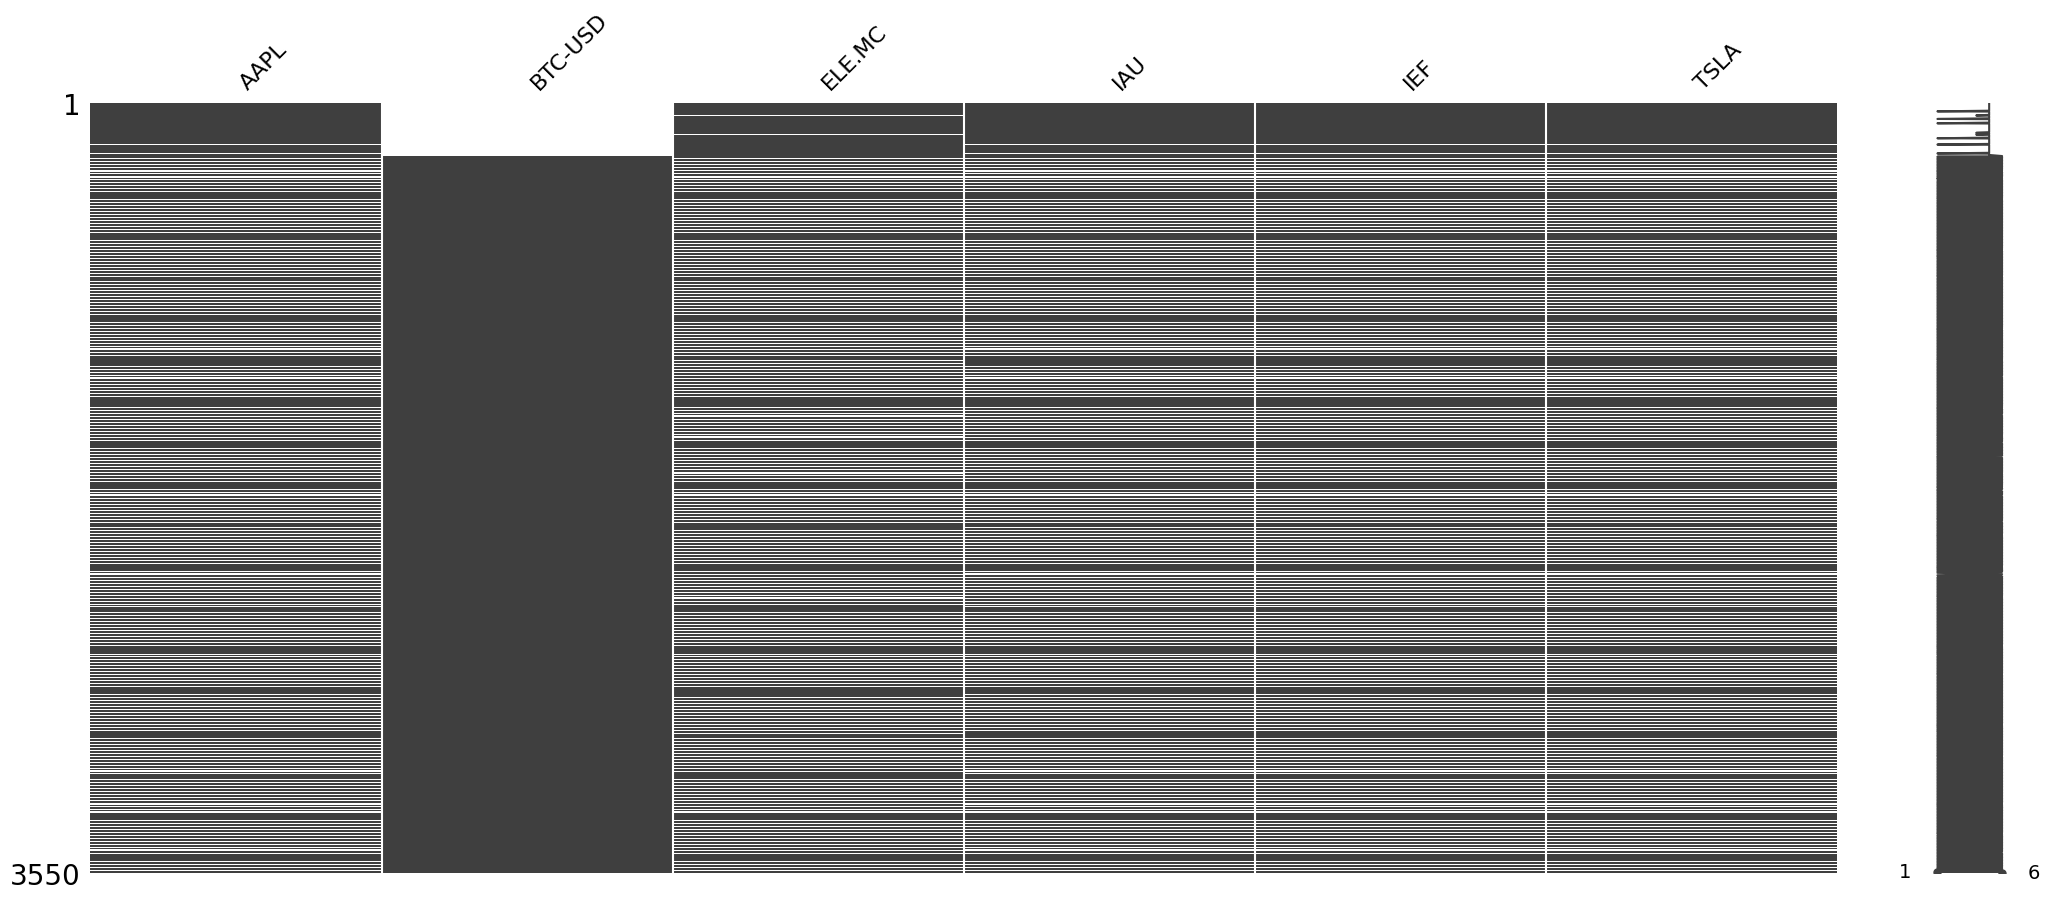

In [19]:
import missingno as msno

msno.matrix(data_close_df)

Eliminamos todos los NaN de las filas, dejando solamente aquellas donde tenemos todos los datos disponibles.

<Axes: >

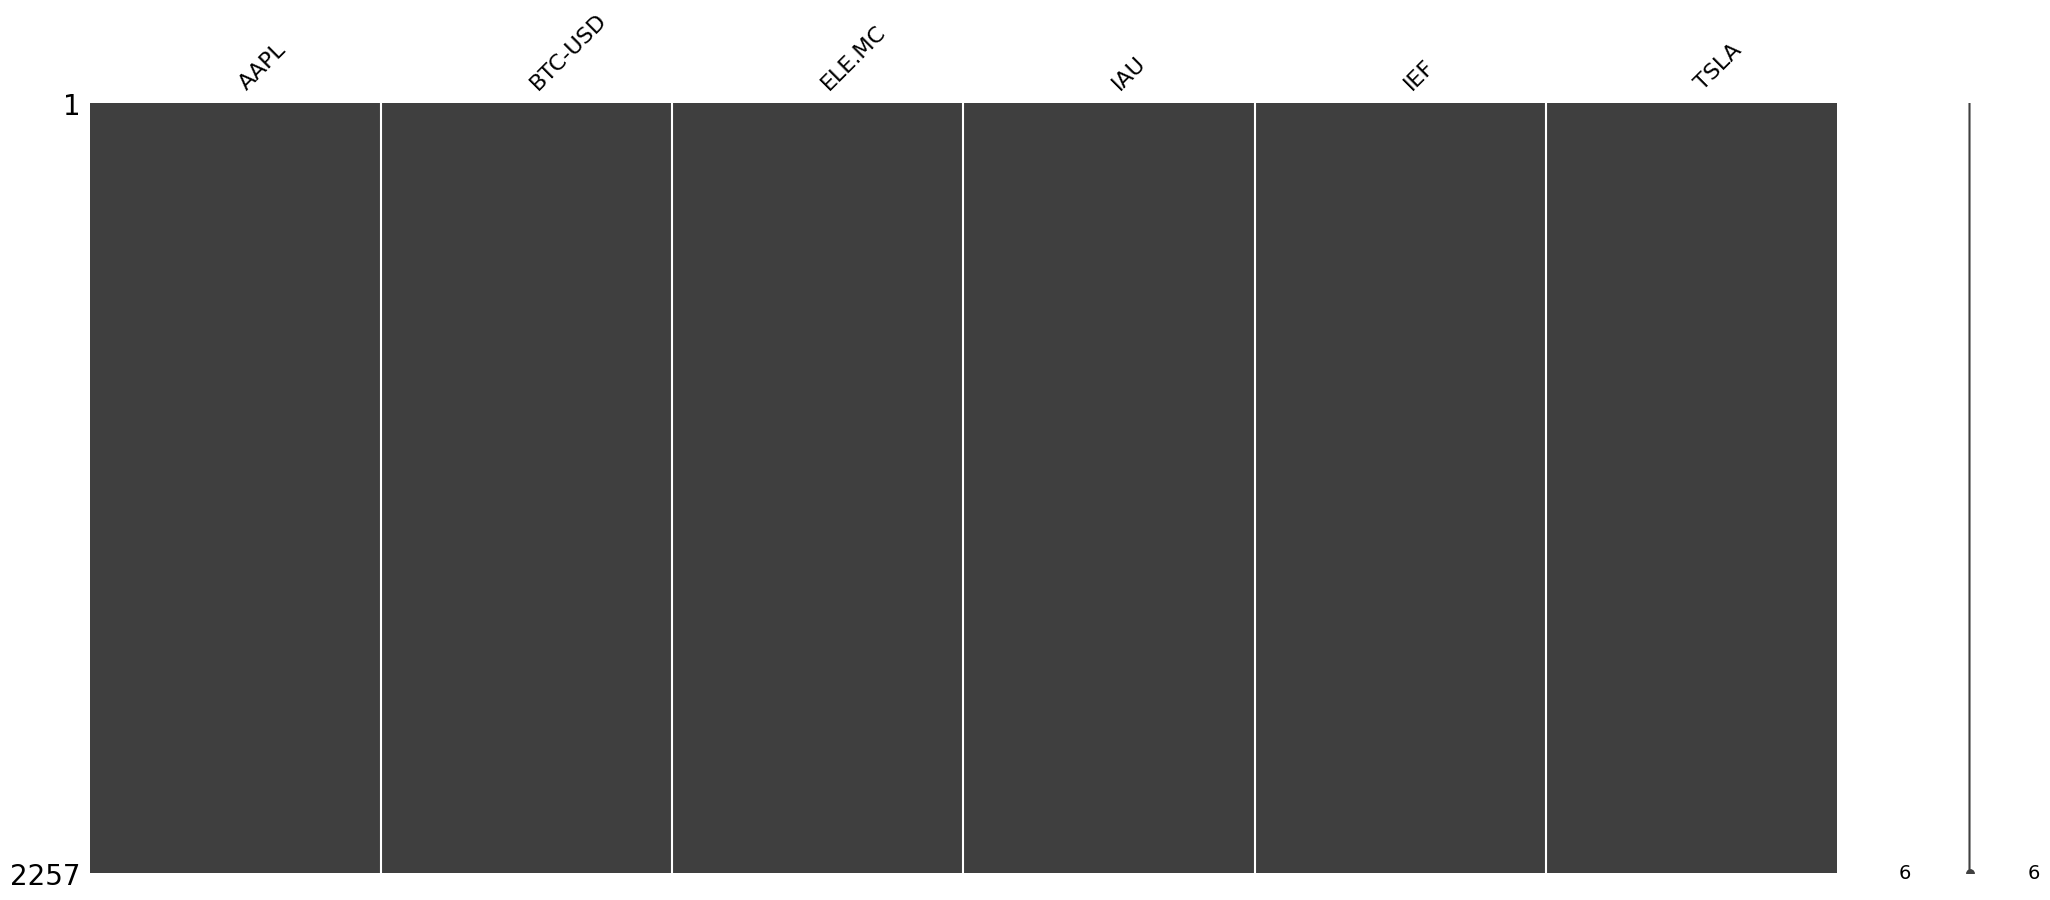

In [20]:
data_close_df = data_close_df.dropna(axis=0, how="any")
msno.matrix(data_close_df)

Calculamos los retornos.

In [21]:
ret_close_df = np.log(data_close_df).diff().dropna()

Hacemos lo mismo con el otro dataframe.

In [22]:
data_OHLC_df_corr

Adj Close                                                \
                  AAPL       CSCO         IBM       INTC        MSFT   
Date                                                                   
2013-10-07   15.203010  16.748629  115.038887  17.101440   27.885912   
2013-10-08   14.990749  16.565710  112.959435  16.839266   27.643059   
2013-10-09   15.166852  16.463264  114.602745  16.921661   27.693300   
2013-10-10   15.261921  16.836430  116.783310  17.303694   28.271114   
2013-10-11   15.360729  17.033991  117.661797  17.423548   28.580963   
...                ...        ...         ...        ...         ...   
2023-09-28  170.690002  53.493656  141.580002  35.180000  313.640015   
2023-09-29  171.210007  53.374516  140.300003  35.549999  315.750000   
2023-10-02  173.750000  54.000000  140.800003  35.459999  321.799988   
2023-10-03  172.399994  53.650002  140.389999  35.689999  313.390015   
2023-10-04  173.660004  53.450001  141.070007  35.930000  318.959991   

                             Close                                    ...  \
                  ORCL        AAPL       CSCO         IBM       INTC  ...   
Date                                                                  ...   
2013-10-07   28.221779   17.419643  22.889999  174.005737  22.830000  ...   
2013-10-08   27.817881   17.176430  22.639999  170.860428  22.480000  ...   
2013-10-09   27.663189   17.378214  22.500000  173.346085  22.590000  ...   
2013-10-10   28.350683   17.487143  23.010000  176.644363  23.100000  ...   
2013-10-11   28.582718   17.600357  23.280001  177.973236  23.260000  ...   
...                ...         ...        ...         ...        ...  ...   
2023-09-28  106.150002  170.690002  53.880001  141.580002  35.180000  ...   
2023-09-29  105.919998  171.210007  53.759998  140.300003  35.549999  ...   
2023-10-02  106.709999  173.750000  54.389999  140.800003  35.459999  ...   
2023-10-03  104.519997  172.399994  53.650002  140.389999  35.689999  ...   
2023-10-04  107.080002  173.660004  53.450001  141.070007  35.930000  ...   

                  Open                                        Volume  \
                   IBM       INTC        MSFT        ORCL       AAPL   
Date                                                                   
2013-10-07  173.852768  22.709999   33.599998   32.860001  312292400   
2013-10-08  173.891006  22.870001   33.310001   32.830002  290917200   
2013-10-09  171.481842  22.510000   33.070000   32.450001  301725200   
2013-10-10  175.114716  22.990000   33.310001   32.480000  278602800   
2013-10-11  177.103256  22.830000   33.680000   33.080002  267738800   
...                ...        ...         ...         ...        ...   
2023-09-28  142.139999  34.650002  310.989990  104.029999   56294400   
2023-09-29  142.000000  35.650002  317.750000  107.110001   51814200   
2023-10-02  140.039993  35.610001  316.279999  105.809998   52164500   
2023-10-03  140.869995  35.270000  320.829987  106.419998   49594600   
2023-10-04  140.369995  36.520000  314.029999  104.959999   52963300   

                                                             
                CSCO      IBM      INTC      MSFT      ORCL  
Date                                                         
2013-10-07  29575900  4148854  21321300  35069300  14150100  
2013-10-08  31865700  5834902  36111200  41017600  23780400  
2013-10-09  45438300  4626981  40435400  35878600  19656000  
2013-10-10  38817500  3827209  39189400  42875100  21580700  
2013-10-11  27773800  3381300  24550600  30033300  14018800  
...              ...      ...       ...       ...       ...  
2023-09-28  17204400  5783200  32265300  19683600   7373600  
2023-09-29  13951200  5703600  28758500  24140300   7296100  
2023-10-02  13934000  3275300  26086200  20570000   5963500  
2023-10-03  15700600  3284400  45292600  21033500   8783300  
2023-10-04  17008700  2637600  39829900  20673500   8841700  

[2516 rows x 36 columns]

<Axes: >

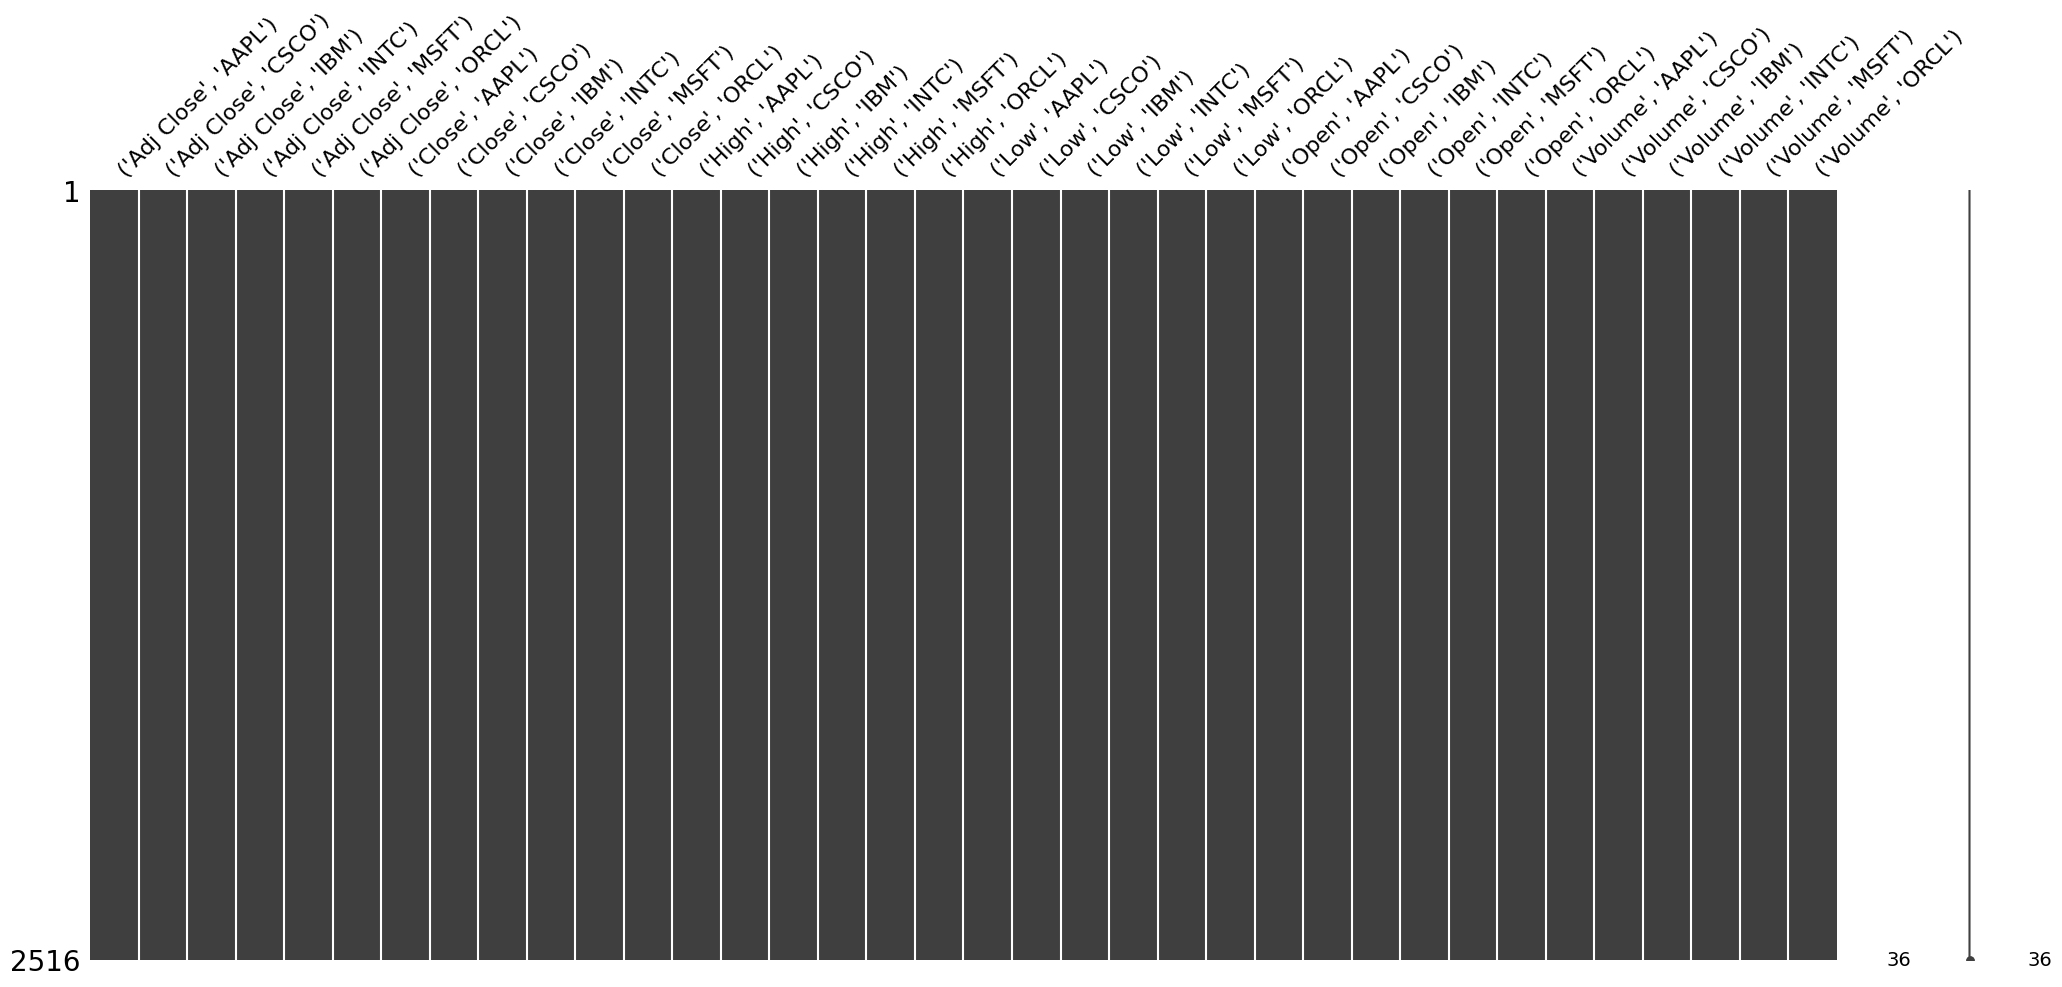

In [23]:
msno.matrix(data_OHLC_df_corr)

Nos quedamos con los datos de cierre de cada día y calculamos los rendimientos diarios.

In [24]:
data_close_df_corr = data_OHLC_df_corr["Adj Close"]
ret_close_df_corr = np.log(data_close_df_corr).diff().dropna()

Hacemos unas gráficas para ver la rentabilidad y volatilidad de cada activo.

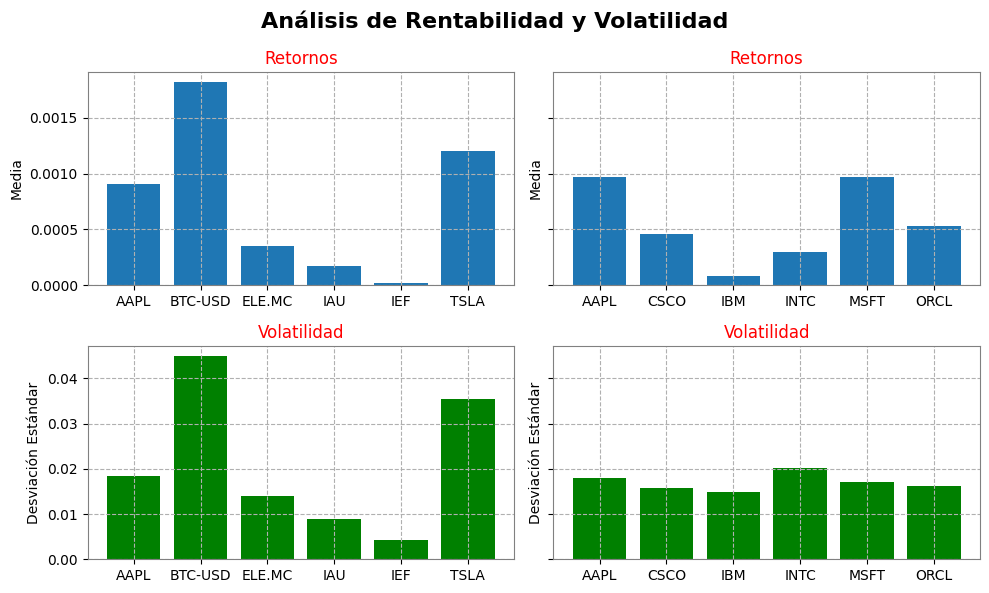

In [25]:
# Puedes calcular los valores medios y la desviación estándar de cada columna así:
means = ret_close_df.mean()
stds = ret_close_df.std()
means_corr = ret_close_df_corr.mean()
stds_corr = ret_close_df_corr.std()

# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0, 0].bar(means.index, means.values)
axes[0, 0].set_ylabel("Media")
axes[0, 0].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 0].bar(stds.index, stds.values, color="green")
axes[1, 0].set_ylabel("Desviación Estándar")
axes[1, 0].set_title("Volatilidad")

# Crear una figura con dos subplots, uno encima del otro
axes[0, 1].bar(means_corr.index, means_corr.values)
axes[0, 1].set_ylabel("Media")
axes[0, 1].set_title("Retornos")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1, 1].bar(stds_corr.index, stds_corr.values, color="green")
axes[1, 1].set_ylabel("Desviación Estándar")
axes[1, 1].set_title("Volatilidad")

# Añadir un título general a la figura
plt.suptitle("Análisis de Rentabilidad y Volatilidad", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vamos a comparar los retornos de dos activos. Concretamente `Bitcoin` (BTC-USD) frente a los `Bonos US` (IEF).

In [26]:
# Crear un gráfico de líneas con Plotly
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=ret_close_df.loc["2016-05-01":, :].index,
        y=ret_close_df.loc["2016-05-01":, :]["BTC-USD"],
        mode="lines",
        name="BTC-USD",
    )
)

fig.add_trace(
    go.Scatter(
        x=ret_close_df.loc["2016-05-01":, :].index,
        y=ret_close_df.loc["2016-05-01":, :]["IEF"],
        mode="lines",
        name="IEF",
    )
)  # iShares 7-10 Year Treasury Bond ETF

# Añadir títulos
fig.update_layout(
    title="COMPARACIÓN ACTIVOS CON MUCHA Y POCA VOLATILIDAD",
    title_font=dict(size=18),  # Ajusta el tamaño del título
    title_x=0.5,  # Centra el título
    yaxis_title="Retornos diarios %",
    margin=dict(
        l=20, r=20, b=20, t=40
    ),  # Ajusta los márgenes para hacer los bordes más pequeños
)

También podemos verlo usando las gráficas de distribución de los retornos diarios de cada activo:

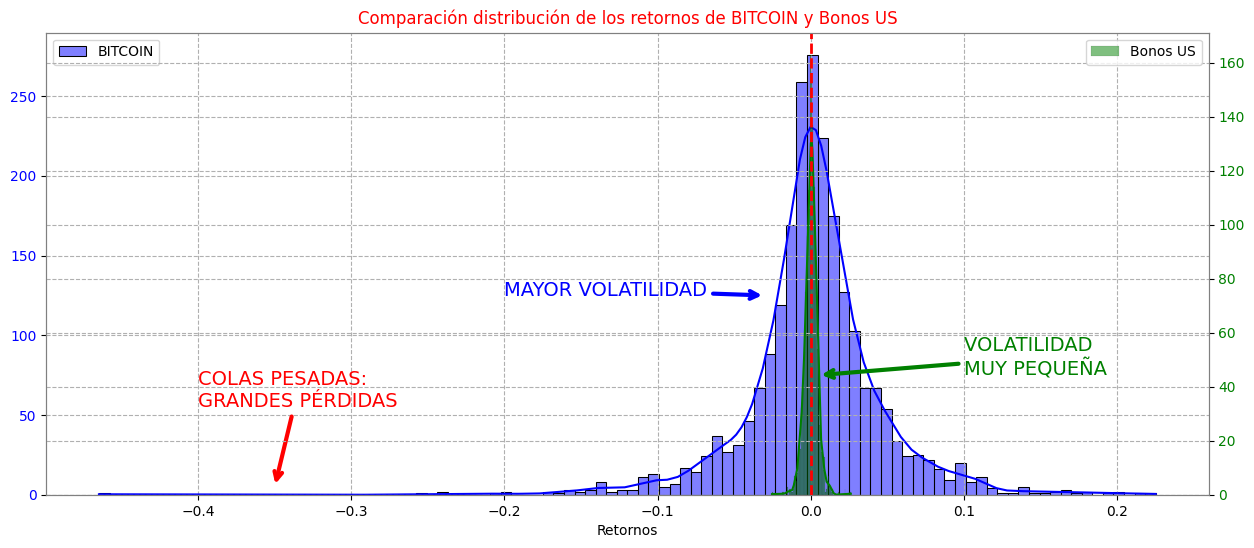

In [27]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Crear el primer gráfico con sns.histplot
sns.histplot(
    data=ret_close_df,
    x="BTC-USD",
    ax=ax1,
    bins=100,
    color="blue",
    kde=True,
    alpha=0.5,
    label="BITCOIN",
)
ax1.set_xlabel("Retornos")
ax1.set_ylabel("", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")

# # Añadir texto en ax2
# text_x = -0.4
# text_y = 25

# ax1.text(-0.2, 125, f"MAYOR VOLATILIDAD", fontsize=12, color='blue')

ax1.annotate(
    "MAYOR VOLATILIDAD",
    xy=(-0.03, 125),
    xytext=(-0.2, 125),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="blue"),
    fontsize=14,
    color="blue",
)

ax1.annotate(
    "VOLATILIDAD \nMUY PEQUEÑA",
    xy=(0.005, 75),
    xytext=(0.1, 75),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="green"),
    fontsize=14,
    color="green",
)

ax1.annotate(
    "COLAS PESADAS: \nGRANDES PÉRDIDAS",
    xy=(-0.35, 5),
    xytext=(-0.4, 55),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="red"),
    fontsize=14,
    color="RED",
)


# Duplicar el eje Y para el segundo gráfico
ax2 = ax1.twinx()

# Crear el segundo gráfico con sns.histplot
sns.histplot(
    data=ret_close_df,
    x="IEF",
    ax=ax2,
    bins=100,
    color="green",
    kde=True,
    alpha=0.5,
    label="Bonos US",
)
ax2.set_ylabel("", color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.legend(loc="upper right")

# Añadir una línea vertical en el eje X en 0
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)
# Configurar título y mostrar el gráfico
plt.title("Comparación distribución de los retornos de BITCOIN y Bonos US")
plt.show()

In [40]:
print("BITCOIN:")
print("  MEDIA:", np.around(ret_close_df["BTC-USD"].mean() * 252, decimals=3))
print("  STD:", np.around(ret_close_df["BTC-USD"].std() * np.sqrt(252), decimals=3))
print()
print("BONOS:")
print("  MEDIA:", np.around(ret_close_df["IEF"].mean() * 252, decimals=3))
print("  STD:", np.around(ret_close_df["IEF"].std() * np.sqrt(252), decimals=3))

BITCOIN:
  MEDIA: 0.459
  STD: 0.713

BONOS:
  MEDIA: 0.004
  STD: 0.066


---

#### Ejercicio

Descarga los datos del fichero `../data/datos_ejercicio_asimetria.csv` y realiza los siguientes apartados con los dos activos que te damos: 

1. Haz una gráfica para visualizar los retornos de cada activo. ¿Qué observas?

2. Analiza el binomio media-varianza. ¿En cuál es más interesante invertir?

Lectura de los ficheros desde Github (utilizar desde colab)

In [28]:
file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python-2023/main/Tema_1_Activos_Intro/data/datos_ejercicio_asimetria.csv"
datos_activo = pd.read_csv(file_path, index_col=0, parse_dates=True)
datos_activo

,Activo,BTC-USD
Date,,
2014-09-18,-0.023950,-0.074643
2014-09-19,0.003392,-0.072402
2014-09-22,0.028220,0.018461
2014-09-23,0.043569,0.080333
2014-09-24,0.016959,-0.029306
...,...,...
2023-09-28,-0.037223,0.025063
2023-09-29,-0.056761,-0.004073
2023-10-02,-0.071284,0.022743


Lectura fichero local

In [ ]:
datos_activo = pd.read_csv(
    "../data/datos_ejercicio_asimetria.csv", index_col=0, parse_dates=True
)


datos_activo

,Activo,BTC-USD
Date,,
2014-09-18,-0.023950,-0.074643
2014-09-19,0.003392,-0.072402
2014-09-22,0.028220,0.018461
2014-09-23,0.043569,0.080333
2014-09-24,0.016959,-0.029306
...,...,...
2023-09-28,-0.037223,0.025063
2023-09-29,-0.056761,-0.004073
2023-10-02,-0.071284,0.022743


In [61]:
# TO-DO: Incluye aquí tus cálculos y explicaciones

---

Para poder analizar el comportamiento de un activo necesitamos la distribución de los retornos, pero en general se emplea solo la rentabilidad y el riesgo.

La teoría de que los activos se pueden caracterizar por el binomio rentabilidad-riesgo se cumple si:

* La función de utilidad del inversor es cuadrática. Fuera del scope de este curso.

* Los **retornos siguen una distribución normal**: Una normal se caracteriza por media y varianza.  

Vamos a comprobar si esta vez los retornos siguen una normal. Para comprobarlo, vamos a usar los retornos de `Bitcoin` y los vamos a comparar con una distribución normal con la misma media y desviación estándar. Para ello, generamos unos datos sintéticos con distribución normal, media y desviación igual a la de los retornos de Bitcoin.

In [30]:
# Definir la media y la desviación estándar
media = ret_close_df["BTC-USD"].mean()
std = ret_close_df["BTC-USD"].std()

# Establecer la semilla (seed)
np.random.seed(3)  # Puedes usar cualquier número como semilla

# Generar una serie de números con distribución normal
data_norm = np.random.normal(media, std, 100000)  # 100000 números aleatorios

Usaremos los gráficos QQ-Plot para visualizar la distribución de los datos. Si los puntos se ajustan a la recta, los datos siguen una distribución normal.

Para más información sobre QQ-Plot pinchar [aquí](https://es.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q)

<img src="../imgs/qinq.PNG" alt="QinQ e histogramas" style="max-width:70%">

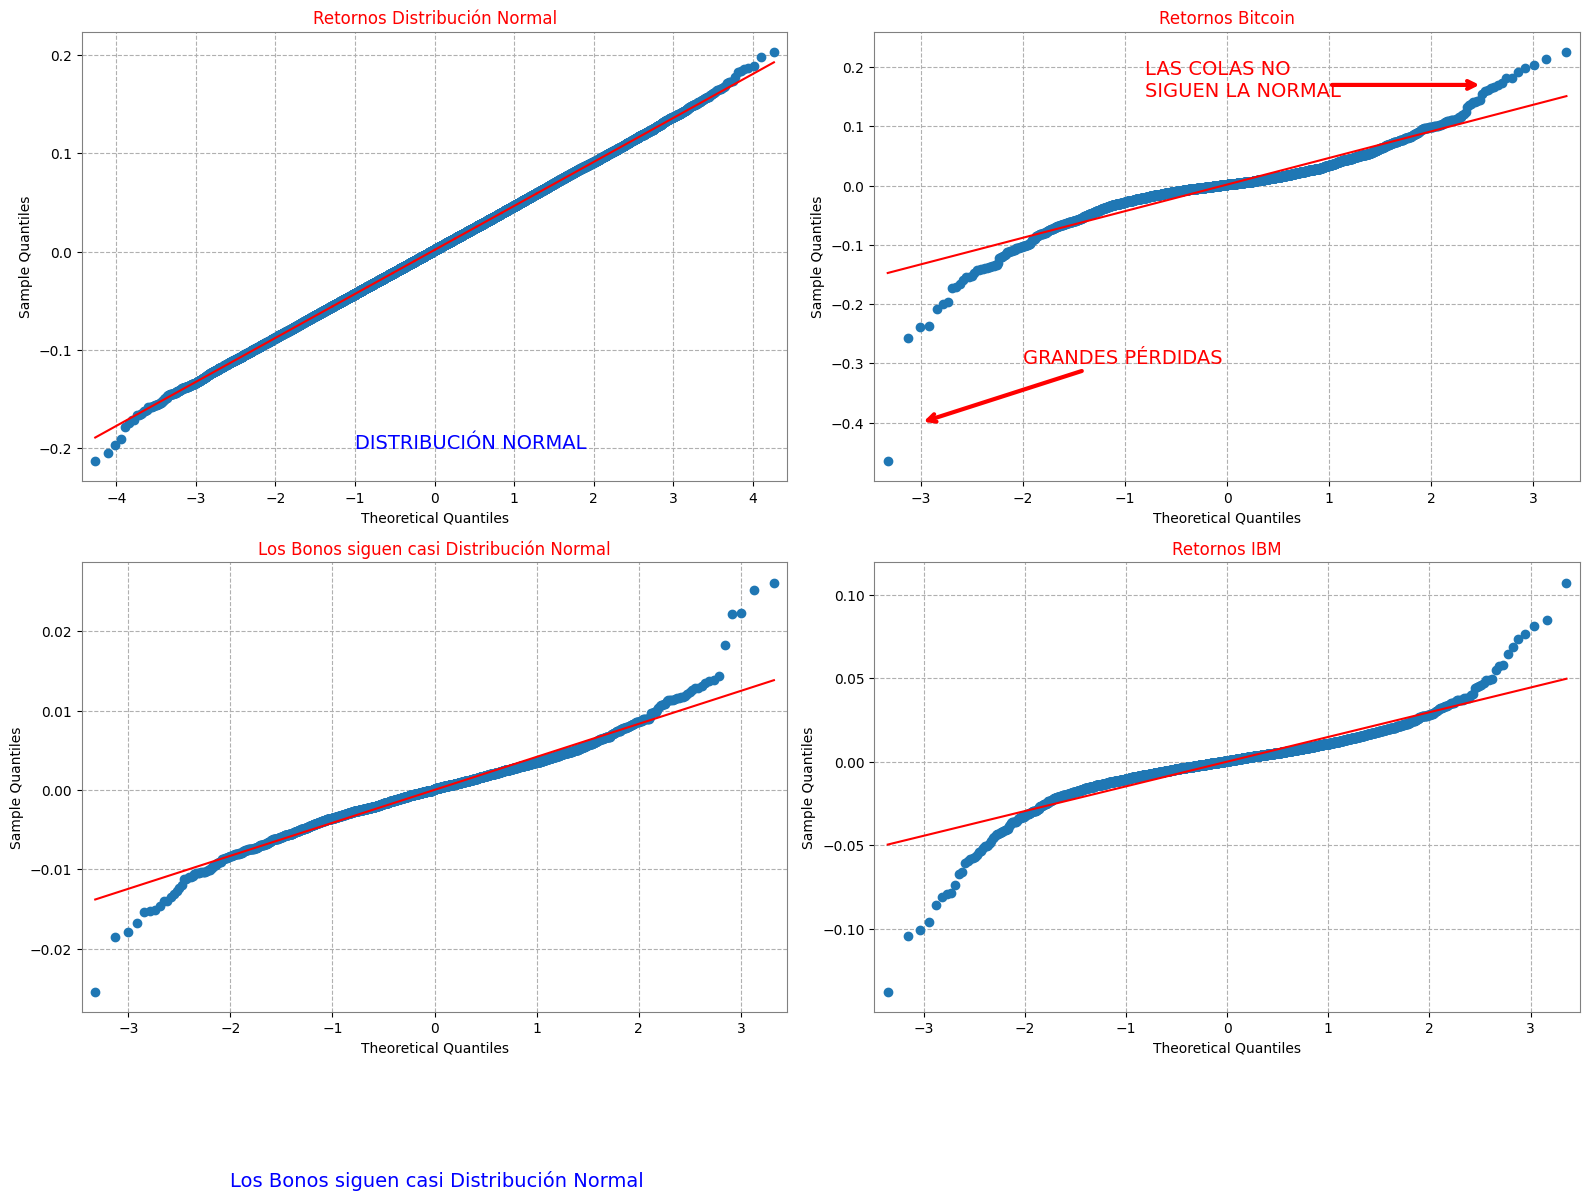

In [31]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # , sharey='row')

# Graficar el primer histograma en el primer subplot
sm.qqplot(data_norm, line="s", ax=axs[0, 0])
axs[0, 0].set_title("Retornos Distribución Normal")

axs[0, 0].text(-1, -0.2, "DISTRIBUCIÓN NORMAL", fontsize=14, color="blue")

# Graficar el segundo histograma en el segundo subplot
sm.qqplot(ret_close_df["BTC-USD"], line="s", ax=axs[0, 1])
axs[0, 1].set_title("Retornos Bitcoin")

# Añadir texto en ax2
text_x = -3
text_y = -0.35

# axs[0,1].text(text_x, text_y, "GRANDES PÉRDIDAS", fontsize=14, color='RED')

text_x = -1.5
text_y = 0.15

axs[0, 1].text(-0.8, 0.15, "LAS COLAS NO \nSIGUEN LA NORMAL", fontsize=14, color="RED")

axs[0, 1].annotate(
    "",
    xy=(2.5, 0.17),
    xytext=(1, 0.17),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="red"),
    fontsize=14,
    color="RED",
)


# Dibuja una flecha utilizando annotate
axs[0, 1].annotate(
    "GRANDES PÉRDIDAS",
    xy=(-3, -0.4),
    xytext=(-2, -0.3),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="red"),
    fontsize=14,
    color="RED",
)


# Graficar el segundo histograma en el segundo subplot
sm.qqplot(ret_close_df["IEF"], line="s", ax=axs[1, 0])
axs[1, 0].set_title("Retornos Bonos US")
axs[1, 0].set_title("Los Bonos siguen casi Distribución Normal")
axs[1, 0].text(
    -2, -0.05, "Los Bonos siguen casi Distribución Normal", fontsize=14, color="blue"
)

# Graficar el segundo histograma en el segundo subplot
sm.qqplot(ret_close_df_corr["IBM"], line="s", ax=axs[1, 1])
axs[1, 1].set_title("Retornos IBM")

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Vamos a aplicar el test de [Kolmogorov-Smirnov](https://es.wikipedia.org/wiki/Prueba_de_Kolmog%C3%B3rov-Smirnov) para comprobar si Bitcoin sigue una distribución normal.

In [32]:
# Prueba de Kolmogorov-Smirnov
stat, p = stats.kstest(ret_close_df["BTC-USD"], "norm")

# Compara el valor p con un nivel de significancia (por ejemplo, 0.05)
alpha = 0.05
if p > alpha:
    print(
        f"El resultado es de {p:.4f}, lo que quiere decir que los datos SÍ SIGUEN una distribución normal (no podemos rechazar la hipótesis nula)"
    )
else:
    print(
        f"El resultado es de {p:.4f}, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)"
    )

El resultado es de 0.0000, lo que quiere decir que los datos NO SIGUEN una distribución normal (rechazamos la hipótesis nula)


Existen otros tests como el test Anderson-Darling. La prueba de Anderson-Darling es especialmente útil porque es más sensible a las colas de la distribución en comparación con otras pruebas, como la prueba de Kolmogorov-Smirnov.

Para ver cómo se realiza este test ver [Anderson-Darling](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

Hemos podido comprobar que los retornos **no siempre siguen una distribución normal**. Concretamente, hemos visto que las colas de la distribución de los retornos son más pesadas que las de una distribución normal. Esto quiere decir que hay más probabilidad de que ocurran eventos extremos (tanto positivos como negativos) de lo que cabría esperar si los retornos siguieran una distribución normal.

Necesitamos más estadísticos para describir un activo. Por tanto vamos a estimar la asimetría y la curtosis de la función de distribución de los retornos y, por otro lado, plantearemos caracterizar los activos utilizando otras funciones de probabilidad, como la t-student.


## 1.4 Asimetría y Curtosis

### Asimetría o skewness

El tercer momento de una función de distribución nos mide su nivel de asimetría. Así:

* Una asimetría positiva indica que la acción tiene una mayor probabilidad por encima de la media.

* Una asimetría negativa indica que la acción tiene una mayor probabilidad por debajo de la media.

* Una asimetría neutra indica que la acción tiene una probabilidad equilibrada a ambos lados de la media.

<center>
    <img src="../imgs/skewness.PNG"  alt="drawing" width="500">
</center>

Analicemos la asimetría de los retornos de los activos que tenemos. Si los retornos siguieran una distribución normal, la asimetría debería ser 0.

In [33]:
df_skew = ret_close_df.skew()
df_corr_skew = ret_close_df_corr.skew()

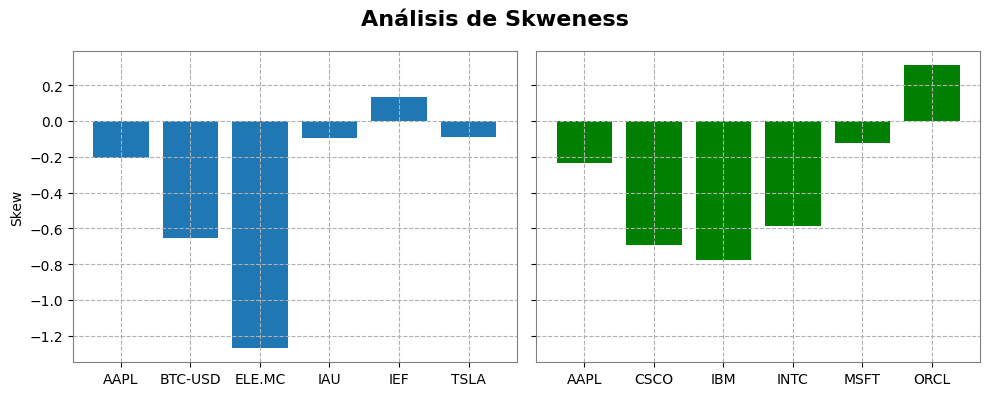

In [34]:
# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey="row")

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(df_skew.index.values, df_skew.values)
axes[0].set_ylabel("Skew")
axes[0].set_title("")

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(df_corr_skew.index.values, df_corr_skew.values, color="green")
axes[1].set_ylabel("")
axes[1].set_title("")


# Añadir un título general a la figura
plt.suptitle("Análisis de Skweness", fontsize=16)  # Título general

# Ajustar el espaciado entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Podemos observar que, mayoritariamente, predominan los activos con asimetrías negativas. Eso significa que, por lo general, la cola izquierda es más pesada que la derecha. Es decir, hay más probabilidad de que ocurran eventos negativos extremos que positivos extremos.

Veamos qué sucede con `Endesa` (ELE.MC), que tiene una asimetría negativa elevada:

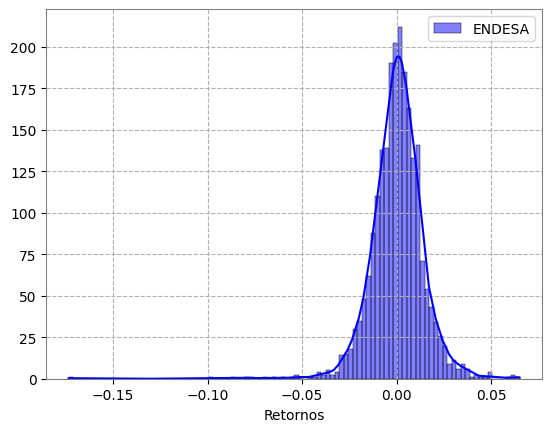

In [ ]:
sns.histplot(
    data=ret_close_df,
    x="ELE.MC",
    bins=100,
    color="blue",
    kde=True,
    alpha=0.5,
    label="ENDESA",
)


plt.xlabel("Retornos")


plt.ylabel("", color="blue")


plt.legend()


plt.show()

In [47]:
print("Asimetría de Endesa:", np.around(ret_close_df["ELE.MC"].skew(), decimals=3))

Asimetría de Endesa: -1.27


Veamos qué sucede con `Oracle` (ORCL), que tiene una asimetría postiva elevada:

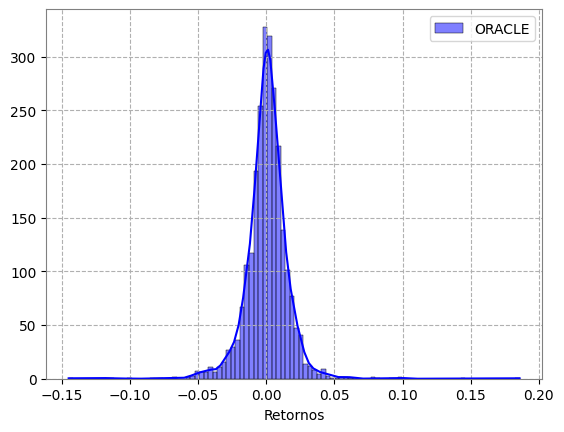

In [ ]:
sns.histplot(
    data=ret_close_df_corr,
    x="ORCL",
    bins=100,
    color="blue",
    kde=True,
    alpha=0.5,
    label="ORACLE",
)


plt.xlabel("Retornos")


plt.ylabel("", color="blue")


plt.legend()


plt.show()

In [49]:
print("Asimetría de Oracle:", np.around(ret_close_df_corr["ORCL"].skew(), decimals=3))

Asimetría de Oracle: 0.312


Veamos qué sucede con `Tesla` (TSLA), que tiene una asimetría neutra:

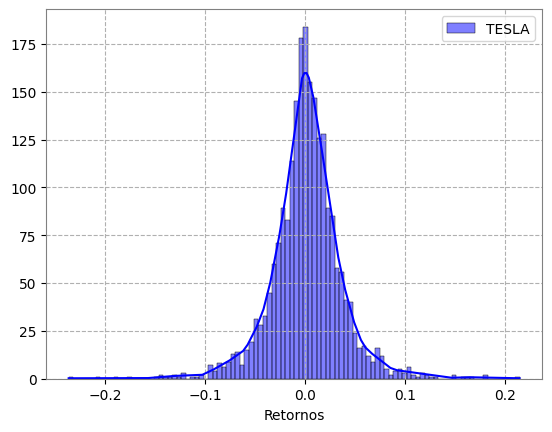

In [ ]:
sns.histplot(
    data=ret_close_df,
    x="TSLA",
    bins=100,
    color="blue",
    kde=True,
    alpha=0.5,
    label="TESLA",
)


plt.xlabel("Retornos")


plt.ylabel("", color="blue")


plt.legend()


plt.show()

In [38]:
print("Asimetría de Tesla:", np.around(ret_close_df["TSLA"].skew(), decimals=3))

Asimetría de Tesla: -0.087


<hr>

### Curtosis o kurtosis

La curtosis, en estadística, es una medida que describe la forma de la distribución de los datos, específicamente cuán "pesadas" o "ligeras" son las colas de la distribución en comparación con una distribución normal (campana de Gauss). Aquí te ofrezco una forma intuitiva de explicarla:
 
Imagina que tienes dos montañas hechas de arena. La primera montaña es amplia y baja, extendiéndose suavemente hacia los lados. La segunda montaña es más alta y puntiaguda, con lados más empinados. Ambas montañas pueden tener la misma cantidad de arena, pero están distribuidas de manera diferente.
 
- **Curtosis baja (Platicúrtica)**: Es como la primera montaña, más plana y extendida. Esto significa que los datos están más dispersos, hay menos concentración de datos cerca del promedio y las colas son más "ligeras". En esta distribución, los eventos extremos (muy lejos del promedio) son menos comunes.
 
- **Curtosis alta (Leptocúrtica)**: Es como la segunda montaña, más alta y estrecha. Aquí, los datos están más concentrados cerca del promedio y las colas son más "pesadas". Esto implica que hay una mayor probabilidad de encontrar valores extremos.
 
- **Curtosis normal (Mesocúrtica)**: Es similar a la distribución normal, ni muy plana ni muy puntiaguda. Representa un equilibrio entre la dispersión de los datos y la frecuencia de eventos extremos.
 
En resumen, la curtosis te dice si los eventos extremos son más o menos comunes en tu conjunto de datos en comparación con una distribución normal. Es importante recordar que la curtosis no mide los picos en sí, sino la "pesadez" de las colas de la distribución.

La interpretación de la curtosis de los retornos de una acción es la siguiente:

* Una curtosis **igual a 0** indica que os retornos siguen una **distribución normal**.

* Una curtosis **mayor que 0** indica que la acción tiene una **mayor probabilidad de generar retornos extremos**, ya sean positivos o negativos.

* Una curtosis **menor que 0** indica que la acción tiene una **menor probabilidad de generar retornos extremos**.

In [39]:
df_curto = ret_close_df.kurtosis()
df_corr_curto = ret_close_df_corr.kurtosis()

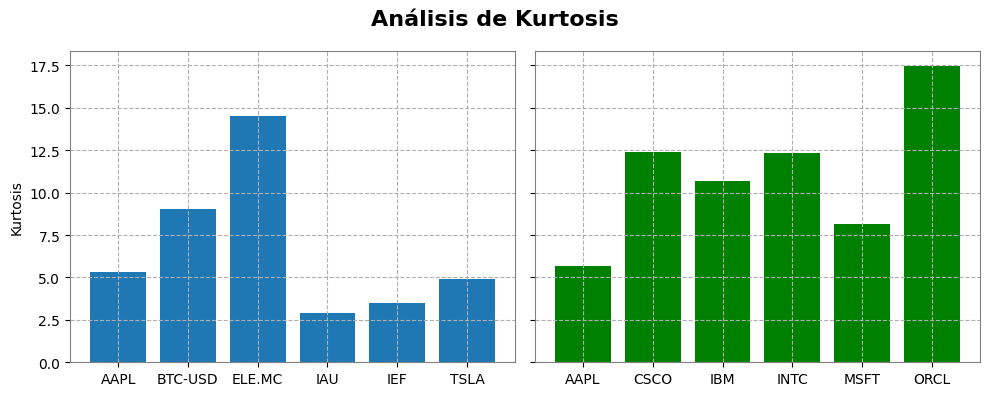

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey="row")
axes[0].bar(df_curto.index.values, df_curto.values)
axes[0].set_ylabel("Kurtosis")
axes[0].set_title("")
axes[1].bar(df_corr_curto.index.values, df_corr_curto.values, color="green")
axes[1].set_ylabel("")
axes[1].set_title("")

plt.suptitle("Análisis de Kurtosis", fontsize=16)  # Título general
plt.tight_layout()
plt.show()

Veamos el impacto de la curtosis en la distribución de los retornos.

Recordad que valores altos de curtosis indican probabilidad de retornos extremos, por lo general grandes pérdidas.

Vamos a graficar la distribución de los retornos de un activo con un valor alto de curtosis y otro con un valor bajo de curtosis.

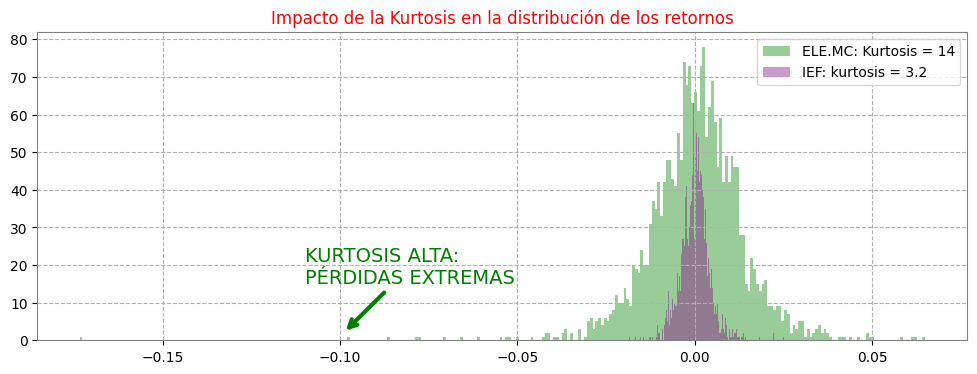

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))

plt.hist(
    ret_close_df["ELE.MC"],
    bins=300,
    color="green",
    alpha=0.4,
    label="ELE.MC: Kurtosis = 14",
)
# plt.hist(ret_close_df_corr['ORCL'], bins=300, color='green', alpha=0.4, label='ORCL')
plt.hist(
    ret_close_df["IEF"],
    bins=300,
    color="purple",
    alpha=0.4,
    label="IEF: kurtosis = 3.2",
)

# Dibuja una flecha utilizando annotate
ax.annotate(
    "KURTOSIS ALTA:\nPÉRDIDAS EXTREMAS",
    xy=(-0.099, 2),
    xytext=(-0.11, 15),
    arrowprops=dict(arrowstyle="->", linewidth=3, color="green"),
    fontsize=14,
    color="green",
)

plt.title("Impacto de la Kurtosis en la distribución de los retornos")
plt.legend()
plt.show()

## 1.5 Distribución t-Student para los retornos

La distribución t-Student es otra distribución de probabilidad que se usa para modelar la distribución de los retornos de los activos. Sus características son:

* Tiene forma de campana simétrica, como la distribución normal.

* Tiene **colas más pesadas** que la distribución normal, es decir, hay más probabilidad de que ocurran eventos extremos.

* Tiene un parámetro adicional llamado grados de libertad. Cuantos más grados de libertad, más se parece a una distribución normal.


Los grados de libertad en una distribución t de Student son un concepto crucial que influye en la forma de la distribución. Generalmente se refieren al número de valores en un cálculo que son libres de variar. 
 
La **distribución t de Student** es utilizada, por ejemplo, para estimar la media de una población cuando el tamaño de la muestra es pequeño y/o la desviación estándar de la población no es conocida. Es una distribución más ancha y más plana que la distribución normal, lo que compensa la incertidumbre adicional que surge al trabajar con muestras pequeñas.
 
**Cómo Afectan los Grados de Libertad**: 

- **Muestras Pequeñas**: Cuando trabajamos con muestras pequeñas, hay más incertidumbre en la estimación de la media poblacional. Con menos datos, hay más variabilidad en las estimaciones que podríamos hacer. Cuantos menos datos tengamos (es decir, cuantos menos grados de libertad), más ancha y más plana será la distribución t, reflejando esta mayor incertidumbre.
- **Muestras Grandes**: A medida que el tamaño de la muestra aumenta (y con él, los grados de libertad), la distribución t comienza a parecerse más a la distribución normal. Esto se debe a que con más datos, la estimación de la media se vuelve más precisa y hay menos variabilidad.

Veamos cómo se comportan los retornos de un activo con una distribución t-Student variando los grados de libertad:

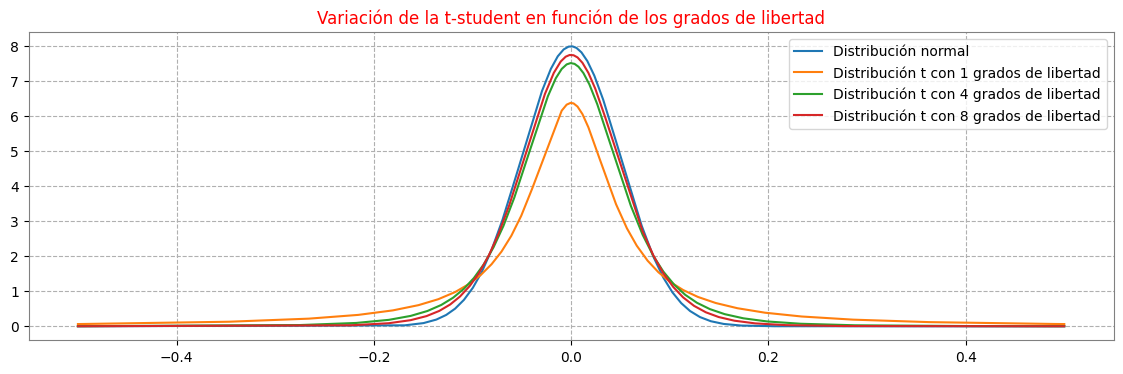

In [ ]:
mu_btc = 0.0
sigma_btc = 0.05

xmin = -0.5
xmax = 0.5
x = np.linspace(xmin, xmax, 1000)
n_pdf = stats.norm.pdf(x, mu_btc, sigma_btc)

plt.figure(figsize=(14, 4))

plt.plot(x, n_pdf, label="Distribución normal")

for libertad_grad in [1, 4, 8]:
    t_params = (
        libertad_grad,
        mu_btc,
        sigma_btc,
    )  # parámetros de la distribución t-student
    t_pdf = stats.t.pdf(x, *t_params)

    # Duplicar el eje Y para el segundo gráfico
    plt.plot(x, t_pdf, label=f"Distribución t con {libertad_grad} grados de libertad")

plt.title("Variación de la t-student en función de los grados de libertad")
plt.legend()
plt.show()

## 1.6 Conclusiones

1- Hemos aprendido a estimar rentabilidades de un activo, que serán las que utilizaremos para su análisis descriptivo en lugar de los precios.


2- Hemos supuesto que las rentabilidades se comportan como una distribución Normal tipificada por su media y varianza.


3- La media es una medida de lo que esperamos obtener de rentabilidad y la desviación típica es una aproximación al riesgo que asumimos.


4- Se ha comprobado que en realidad, las funciones de distribución de los retornos de los activos no se comportan exactamente igual a una Normal. Generalmente tenemos colas pesadas con incidencias significativas en el resultado de nuestras inversiones.


5- Hemos estimado el tercer y cuarto momento (asimetría y curtosis) para tratar de cuantificar la importancia de las colas pesadas de la distribución.


6- Hemos utilizado funciones de distribución alternativas a la Normal, como la t-student, para modelizar el comportamiento de la rentabilidad de un activo.